## <font color='red'> Molecular Docking of CHK1 inhibitors </font>

### <font color='blue'>Background</font>
Checkpoint kinase 1 (Chk1), is a serine/threonine-specific protein kinase. Chk1 coordinates the DNA damage response (DDR) and cell cycle checkpoint response. Activation of Chk1 results in the initiation of cell cycle checkpoints, cell cycle arrest, DNA repair and cell death to prevent cells with damaged or incompletely replicated DNA from progressing through the cell cycle.

Chk1 has a central role in coordinating the DNA damage response and therefore is an target for anti cancer drugs.

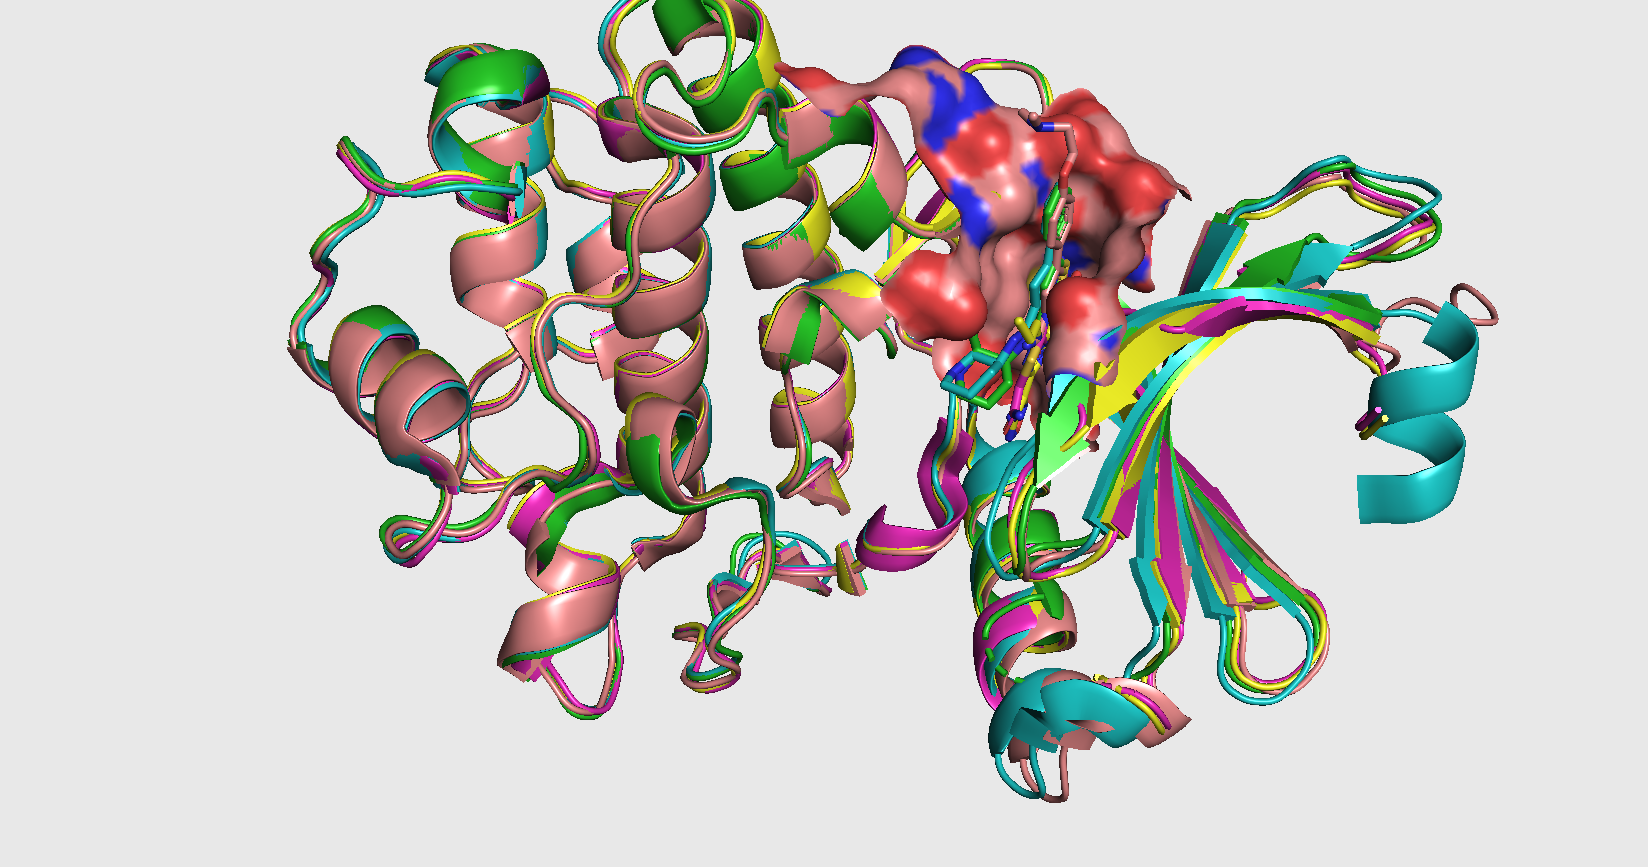
        **Fig 1: Chk1 PDB structure with ligands in its binding pocket.** 
        
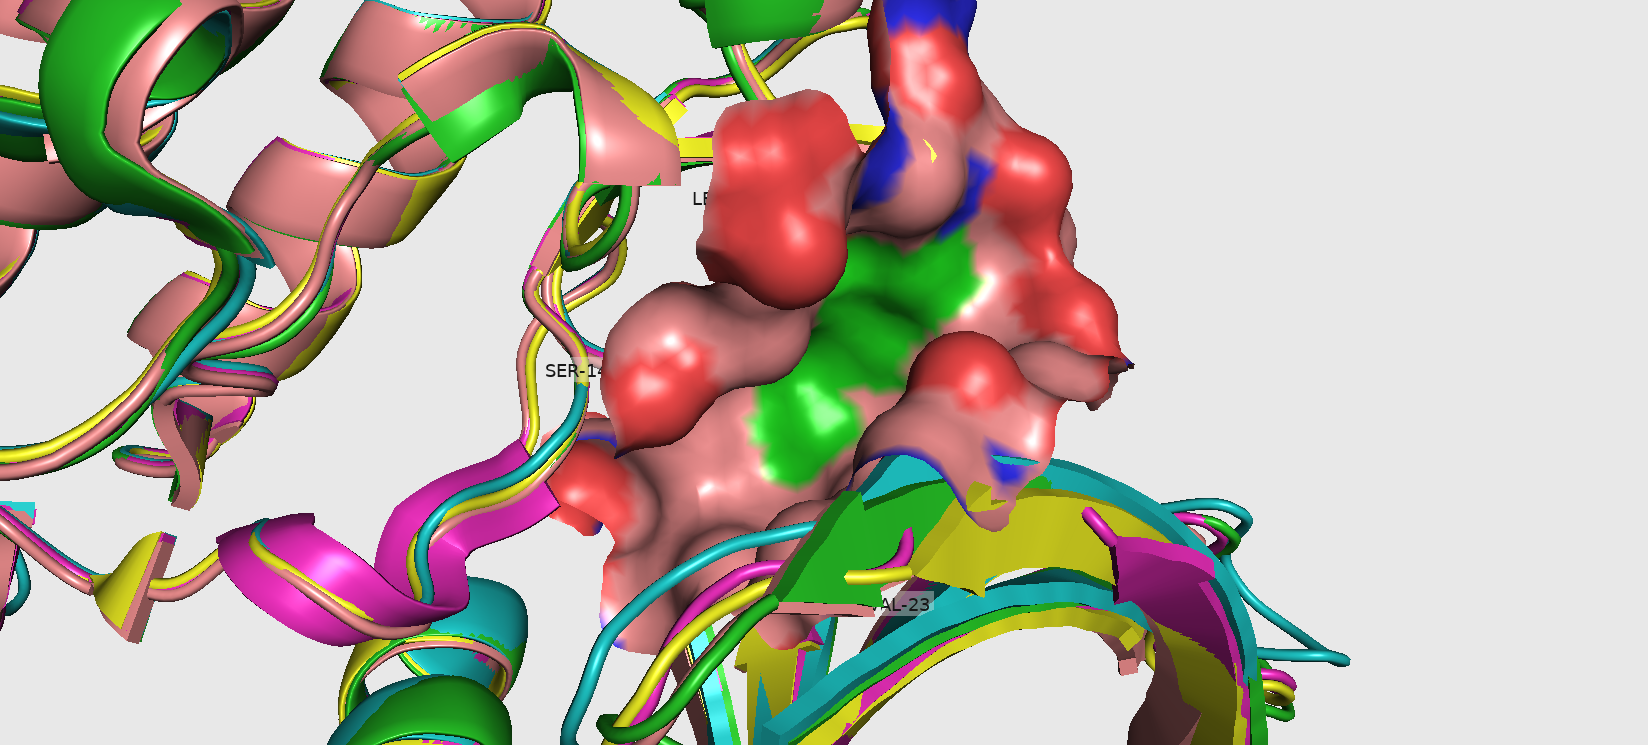

   **Fig 2: Close up of binding pocket without ligand with hinge region redidues (Glu85, Cys87) colored in green** 
   
We will be using PDB <font color='red'>**6FCF**</font> to dock the ligand in the ATP binding site. 

### We will be using [docking_py](https://github.com/samuelmurail/docking_py) for this purpose. Read its documetation [here](https://docking-py.readthedocs.io/en/latest/) 


In [ ]:
%pwd
import conda
!jupyter kernelspec list --json
!which -a python

In [1]:
from pdb_manip_py import pdb_manip

### Get the PDB and extract ligand

First we need to extract the ligand coordinates from the the 6FCF.pdb PDB file and extract the coordinates of D58 an inhibitor of the Chk1 (kinase) using the pdb_manip_py library.

In [2]:
# Create a Coor object
coor_6fcf = pdb_manip.Coor()
coor_6fcf.get_PDB('6fcf', 'pdbs/6fcf.pdb')

In [7]:
# Select res_name MK1
lig_coor = coor_6fcf.select_part_dict(selec_dict={'res_name': ['D58']})
# Save the ligand coordinates
lig_coor.write_pdb('data/d58.pdb')

In [8]:
view_lig = lig_coor.view
view_lig

NGLWidget()

### Extract protein coordinates with pdb_manip_py
We need to extract the receptor coordinates, we will use the 6fcf.pdb PDB file and extract the coordinates of the Checkpoit kinase (Chk1) using the pdb_manip_py library:

In [9]:
# Keep only the amino acids
rec_coor = coor_6fcf.select_part_dict(selec_dict={'res_name': pdb_manip.PROTEIN_RES})
rec_coor.write_pdb('data/rec.pdb')

In [10]:
view_rec = rec_coor.view
view_rec

NGLWidget()

### Prepare receptor structures
We need to create a Docking object, and the use the functions prepare_ligand() and prepare_receptor():

In [12]:
from docking_py import docking

test_dock = docking.Docking('test', lig_pdb='data/d58.pdb', rec_pdb='data/rec.pdb')
test_dock.prepare_receptor()

python2.7 ../anaconda3/envs/docking/bin/prepare_receptor4.py -r data/rec.pdb -A checkhydrogens -o data/rec.pdbqt


### Prepare Ligand

In [13]:
test_dock.prepare_ligand()

python2.7 ../../anaconda3/envs/docking/bin/prepare_ligand4.py -l d58.pdb -B none -A hydrogens -o d58.pdbqt


## Launch Docking

In [20]:
test_dock.run_docking(out_pdb='test_dock.pdb',
                      num_modes=10,
                      energy_range=10,
                      exhaustiveness=16,
                      dock_bin='vina')

run_docking() not launched test_dock.pdb already exists


## Analyse the results

In [15]:
rmsd_list = test_dock.compute_dock_rmsd(test_dock.lig_pdbqt)

File name doesn't finish with .pdb read it as .pdb anyway


In [16]:
rmsd_list

[10.720864397022979,
 6.724389990321463,
 7.805247705354103,
 7.330959225182631,
 8.729810824540131,
 7.108576866329583,
 8.268726435852606,
 9.410734020598586,
 9.766821976268895,
 14.633254319109675]

### View docked poses

In [18]:
view_dock = test_dock.view_dock(ref_pdb="pdbs/6fcf.pdb")
view_dock

NGLWidget(max_frame=9)

In [19]:
test_dock.affinity

{1: {'affinity': -8.5, 'rmsd_low': 0.0, 'rmsd_high': 0.0},
 2: {'affinity': -8.3, 'rmsd_low': 4.286, 'rmsd_high': 8.093},
 3: {'affinity': -8.2, 'rmsd_low': 2.978, 'rmsd_high': 7.18},
 4: {'affinity': -8.2, 'rmsd_low': 3.676, 'rmsd_high': 7.509},
 5: {'affinity': -7.9, 'rmsd_low': 2.685, 'rmsd_high': 7.171},
 6: {'affinity': -7.7, 'rmsd_low': 5.373, 'rmsd_high': 8.662},
 7: {'affinity': -7.7, 'rmsd_low': 3.156, 'rmsd_high': 6.694},
 8: {'affinity': -7.3, 'rmsd_low': 2.884, 'rmsd_high': 6.976},
 9: {'affinity': -7.2, 'rmsd_low': 8.593, 'rmsd_high': 11.426},
 10: {'affinity': -7.2, 'rmsd_low': 4.489, 'rmsd_high': 7.177}}